In [1]:
import datetime
import pandas as pd  
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

### melihat 5 data teratas pada dataset

In [2]:
dataset.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000


In [3]:
dataset.shape

(5000, 9)

### Mengecek Missing Value Dataset

In [4]:
dataset.isnull().sum()

order_id       0
order_date     0
customer_id    0
city           0
province       0
product_id     0
brand          0
quantity       0
item_price     0
dtype: int64

### Menambahkan column month

In [5]:
dataset['month'] = dataset['order_date'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

In [6]:
dataset.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,month
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10


### Menambahkan Column GMV

In [7]:
dataset['gmv'] = dataset['item_price'] * dataset['quantity']
dataset.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,month,gmv
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08,820000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000


### Case 1: Menentukan brand top 5

### mengambil informasi top 5 brands berdasarkan quantity data penjualan bulan Desember 2019

In [14]:
top_5brands = (dataset[dataset['month']=='2019-12']
.groupby('brand')['quantity']
.sum().reset_index()
.sort_values(by='quantity',ascending=False).head())

In [9]:
print(top_5brands)

     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


In [10]:
dataset_topbrand_dec = dataset[(dataset['month']=='2019-12') & (dataset['brand'].isin(top_5brands['brand'].to_list()))]

In [11]:
dataset_topbrand_dec.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,month,gmv
8,1741846,2019-12-30,16873,Jakarta Barat,DKI Jakarta,P3203,BRAND_S,32,450000,2019-12,14400000
14,1734790,2019-12-18,17422,Jakarta Selatan,DKI Jakarta,P0122,BRAND_A,12,695000,2019-12,8340000
19,1731961,2019-12-13,13880,Bogor,Jawa Barat,P2853,BRAND_R,6,740000,2019-12,4440000
35,1741561,2019-12-29,13521,Bandung,Jawa Barat,P3344,BRAND_S,2,520000,2019-12,1040000
38,1735633,2019-12-19,17096,Jakarta Selatan,DKI Jakarta,P3285,BRAND_S,4,1325000,2019-12,5300000


### Case 2: Multi-line chart daily quantity untuk brand top 5

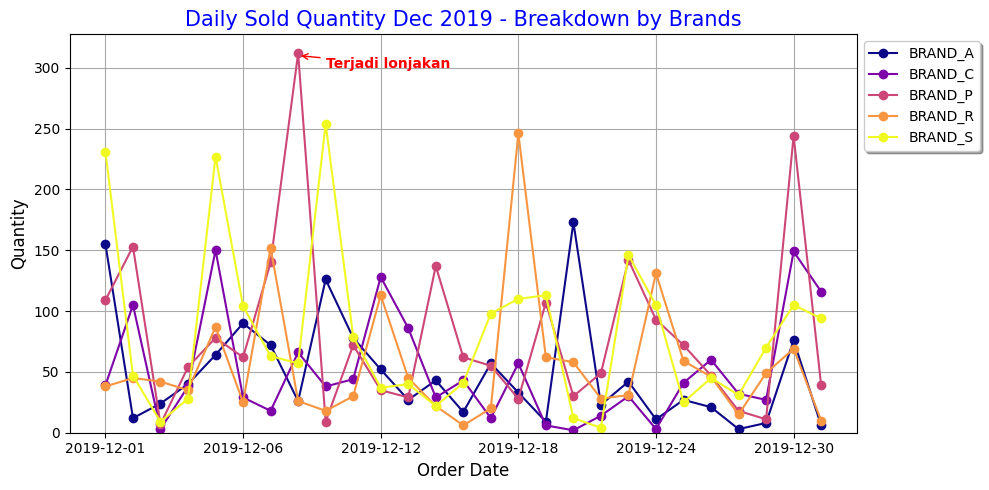

In [75]:
dataset_topbrand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='o', cmap='plasma')
plt.title('Daily Sold Quantity Dec 2019 - Breakdown by Brands',fontsize=15,color='blue')
plt.xlabel('Order Date',fontsize=12)
plt.ylabel('Quantity',fontsize=12)
plt.grid(color='darkgrey')
plt.ylim(ymin=0)
plt.legend(bbox_to_anchor=(1, 1),shadow=True,ncol=1)
#annotate 1
plt.annotate('Terjadi lonjakan', xy=(7, 310),xytext=(8,300),weight='bold',color='red',arrowprops=dict(arrowstyle='->',connectionstyle='arc3',color='red'))

plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

### Case 3: Kuantitas penjualan brand top 5 selama Desember 2019

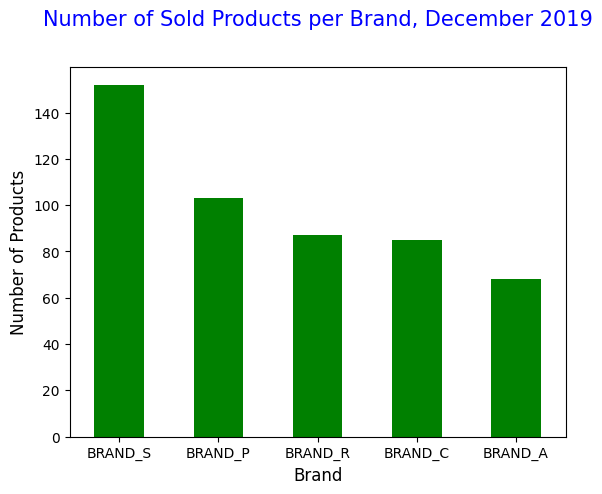

In [202]:
plt.clf()
dataset_topbrand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Number of Sold Products per Brand, December 2019',fontsize=15,color='blue',pad=30)
plt.xlabel('Brand',fontsize=12)
plt.ylabel('Number of Products',fontsize=12)
plt.xticks(rotation=0)
plt.ylim(ymin=0)
plt.show()

### Case 4: Penjulan produk diatas 100 dan dibawah 100 selama Desember 2019

In [35]:
dataset_topbrand_dec_product = dataset_topbrand_dec.groupby(['product_id','brand'])['quantity'].sum().reset_index()
dataset_topbrand_dec_product.head()

,product_id,brand,quantity
0,P0002,BRAND_A,1
1,P0003,BRAND_A,32
2,P0011,BRAND_S,2
3,P0029,BRAND_A,12
4,P0030,BRAND_A,30


In [50]:
dataset_topbrand_dec_product['quantity_group'] = dataset_topbrand_dec_product['quantity'].apply(lambda x : '>=100' if x>=100 else'<=100')
dataset_topbrand_dec_product.sort_values(by='quantity',ascending=True)
dataset_topbrand_dec_product.head()

,product_id,brand,quantity,quantity_group
59,P0255,BRAND_A,258,>=100
465,P3534,BRAND_S,234,>=100
239,P2770,BRAND_P,216,>=100
246,P2790,BRAND_P,185,>=100
187,P2489,BRAND_P,170,>=100


In [54]:
s_sort = dataset_topbrand_dec_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)
s_sort.head()

brand
BRAND_S    152
BRAND_P    103
BRAND_R     87
BRAND_C     85
BRAND_A     68
Name: product_id, dtype: int64

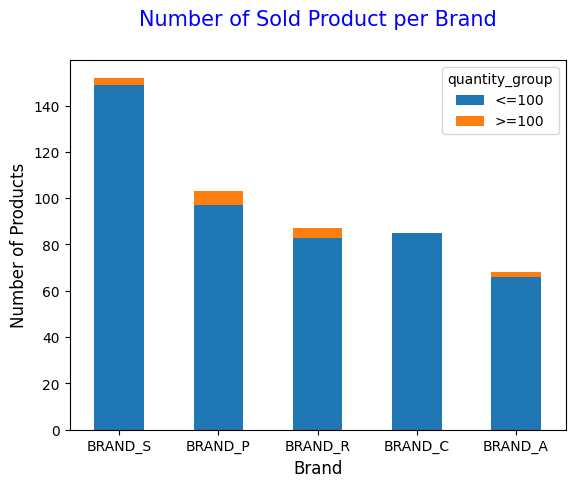

In [87]:
dataset_topbrand_dec_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index,level='brand').unstack().plot(kind='bar',stacked=True)
plt.title('Number of Sold Product per Brand',fontsize=15,pad=25,color='blue')
plt.xlabel('Brand',fontsize=12)
plt.ylabel('Number of Products',fontsize=12)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

### Case 5: Murah atau mahalkah harga produk brand top 5

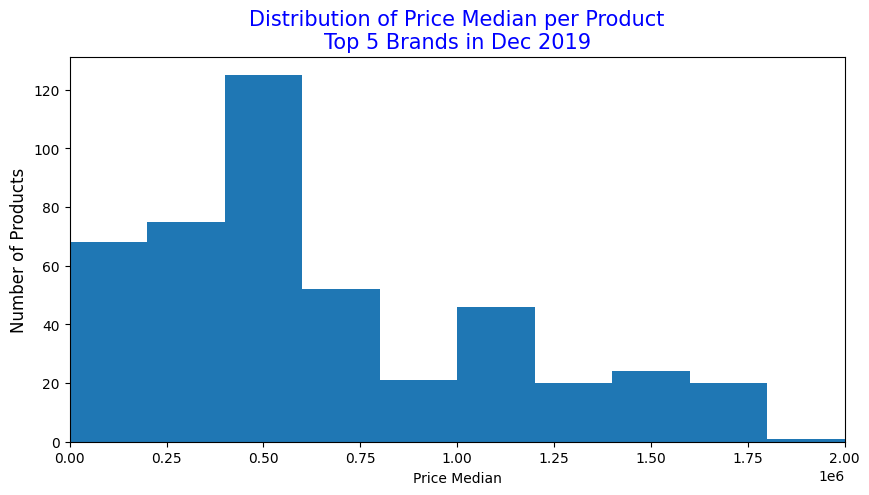

In [168]:
plt.figure(figsize=(10, 5))
plt.hist(dataset_topbrand_dec.groupby('product_id')['item_price'].median(),bins=10,range=(1, 2000000),stacked=True)
plt.title('Distribution of Price Median per Product\nTop 5 Brands in Dec 2019',fontsize=15, color='blue')
plt.xlabel('Price Median')
plt.ylabel('Number of Products',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.show()



### Case 6a: Korelasi quantity vs GMV

In [184]:
dataset_topbrand_dec_korelasi = dataset_topbrand_dec.groupby('product_id').agg({'quantity': 'sum','gmv': 'sum','item_price': 'median'}).reset_index()
dataset_topbrand_dec_korelasi.head()

,product_id,quantity,gmv,item_price
0,P0002,1,904000,904000.0
1,P0003,32,14400000,450000.0
2,P0011,2,11890000,5945000.0
3,P0029,12,3720000,310000.0
4,P0030,30,7200000,240000.0


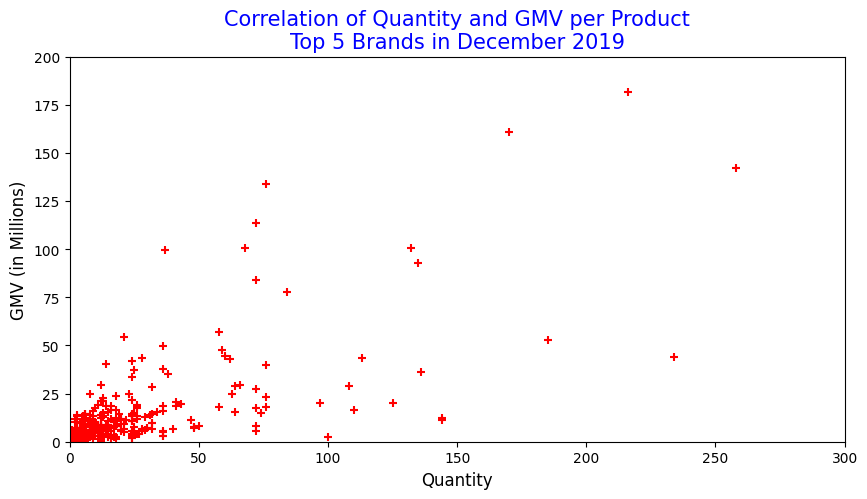

In [187]:
plt.figure(figsize=(10, 5))
plt.scatter(dataset_topbrand_dec_korelasi['quantity'],dataset_topbrand_dec_korelasi['gmv'],marker='+',color='red')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

### Case 6b: Korelasi median harga vs quantity

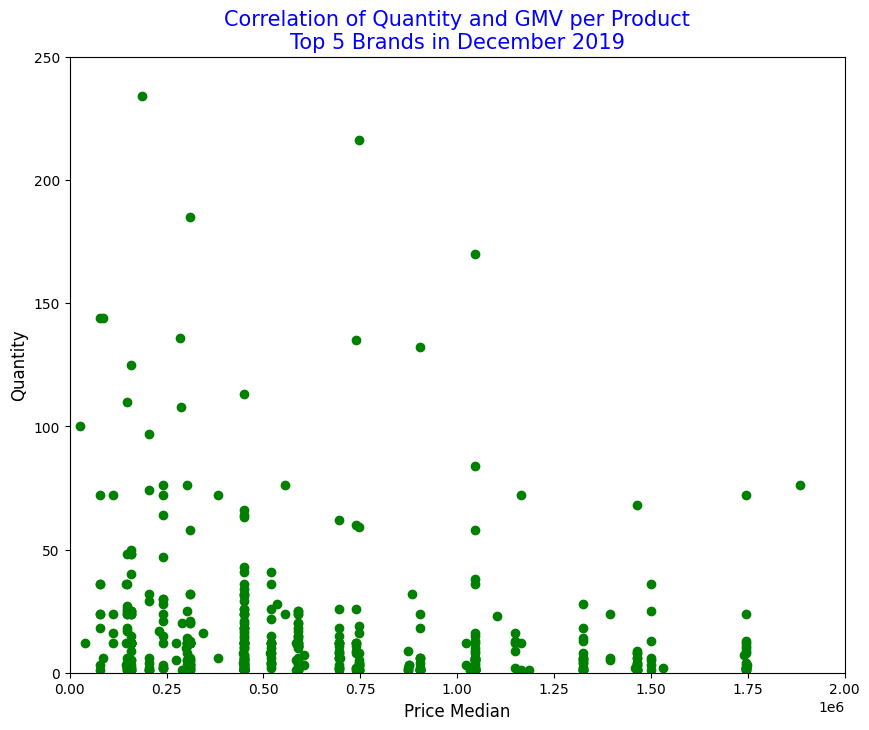

In [197]:
plt.figure(figsize=(10, 8))
plt.scatter(dataset_topbrand_dec_korelasi['item_price'],dataset_topbrand_dec_korelasi['quantity'],marker='o',color='green')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)
plt.show()